# Final Project- AI Algorithms I (AIDI 1002)

# Name : Pushkal Suri, Student ID :  100799314 

# Name : Harshit Morwal, Student ID : 100870851

# Prepare Problem
    a) Load libraries
    b) Load dataset

Load libraries

In [400]:
#Load Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load dataset

In [401]:
#Load Dataset
dataset = pd.read_csv('./house_price.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


# Prepare Data
    a) Data Cleaning
    b) Feature Selection
    c) Data Transforms

Load Zip Code Dataset

In [402]:
zipCodeMap = pd.read_csv('./US20Codes20201320Data.csv')
zipCodeMap

,zipcode,LAT,LNG
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135
...,...,...,...
33139,99923,56.002315,-130.041026
33140,99925,55.550204,-132.945933
33141,99926,55.138352,-131.470424
33142,99927,56.239062,-133.457924


1. Mapping Zipcode with Latitude and Longitude Data
2. Finding Age of the house
3. Converting Renovation year to binary class i.e. if year is present then 1 else 0

In [403]:
#Remove id and date Column and find the age of the house
dataset2=dataset.drop(['id','date'],axis=1)
dataset2['Sale Year'] = dataset['date'].str[0:4]
dataset2['Sale Year'] = dataset2['Sale Year'].astype('int64')
dataset2['Age of House (in years)'] = dataset2['Sale Year']-dataset2['yr_built']
dataset2['Renovation'] = np.where(dataset['yr_renovated'] == 0, 0, 1)
dataset2=dataset2.drop(['Sale Year','yr_built','yr_renovated'],axis=1)
#dataset_mappedZipCodes = dataset2.merge(zipCodeMap, on='zipcode', how='left')
dataset_mappedZipCodes = pd.merge(dataset2, zipCodeMap, on='zipcode', how='left') 
dataset_mappedZipCodes = dataset_mappedZipCodes.drop(['zipcode'],axis=1)
dataset_mappedZipCodes

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,Age of House (in years),Renovation,LAT,LNG
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59,0,47.499387,-122.243852
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,63,1,47.716513,-122.295829
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82,0,47.755665,-122.248061
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49,0,47.536464,-122.394409
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28,0,47.622542,-122.044210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,1530,1509,5,0,47.678255,-122.338152
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,1830,7200,1,0,47.500058,-122.357848
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,1020,2007,5,0,47.585627,-122.291960
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,1410,1287,11,0,47.493732,-121.998724


# Summarize Data/ Exploratory Data Analysis
    a) Descriptive statistics
    b) Data visualizations

In [404]:
dataset_mappedZipCodes.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,Age of House (in years),Renovation,LAT,LNG
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1986.552492,12768.455652,43.317818,0.042289,47.560423,-122.204407
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,685.391304,27304.179631,29.375493,0.201253,0.137417,0.154614
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,399.000000,651.000000,-1.000000,0.000000,47.216372,-122.473322
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1490.000000,5100.000000,18.000000,0.000000,47.451576,-122.316969
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000,40.000000,0.000000,47.574245,-122.232795
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,2360.000000,10083.000000,63.000000,0.000000,47.678255,-122.117029
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,6210.000000,871200.000000,115.000000,1.000000,47.760785,-121.606221


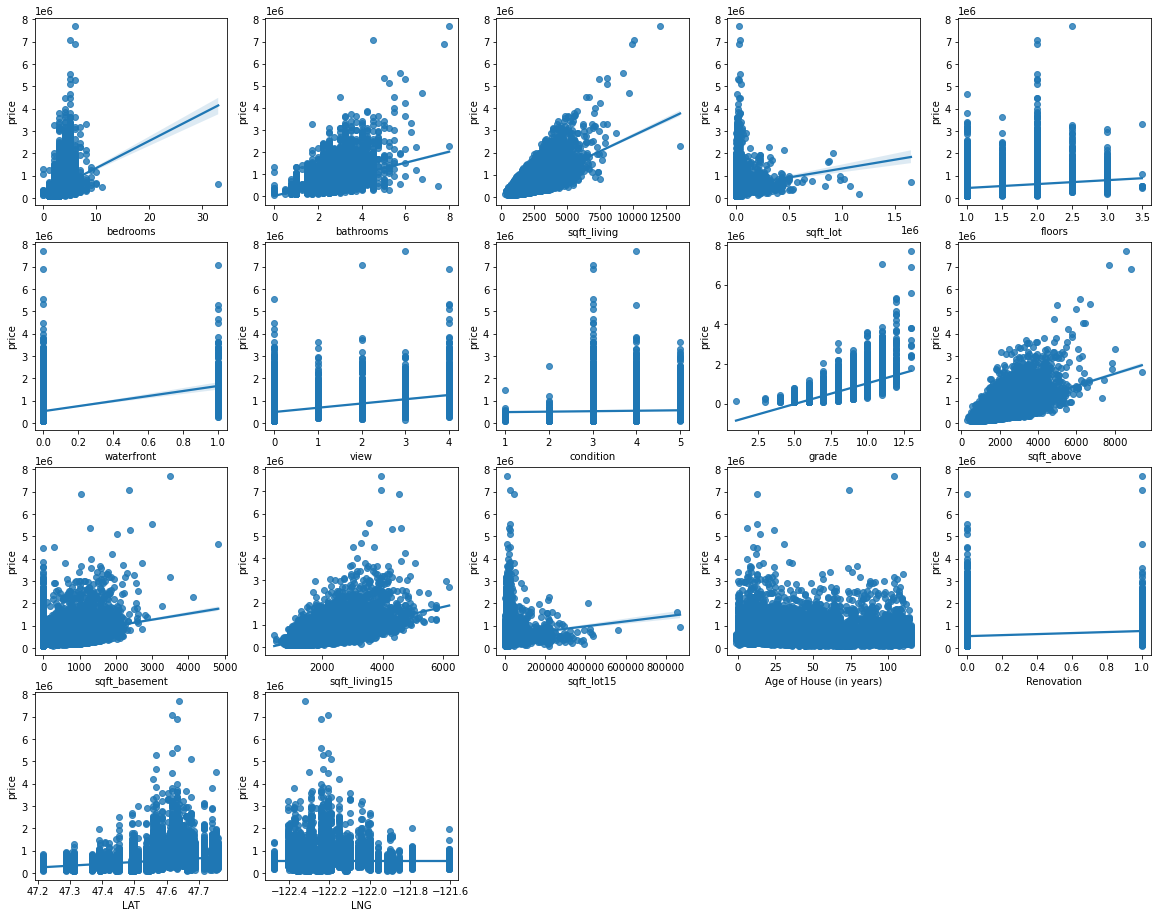

In [405]:
#Scatterplots - Price vs. Independent Variables
plt.figure(figsize  = (20, 20))
cnt = 1
for col in dataset_mappedZipCodes.columns:
    if (col == 'price'):
        continue
    
    plt.subplot(5, 5, cnt)
    lmgraph = sns.regplot(x = dataset_mappedZipCodes[col], y = dataset_mappedZipCodes.price)
    lmgraph.set_xlabel(col)
    lmgraph.set_ylabel('price')
    cnt += 1

Finding Correlation 

<AxesSubplot:>

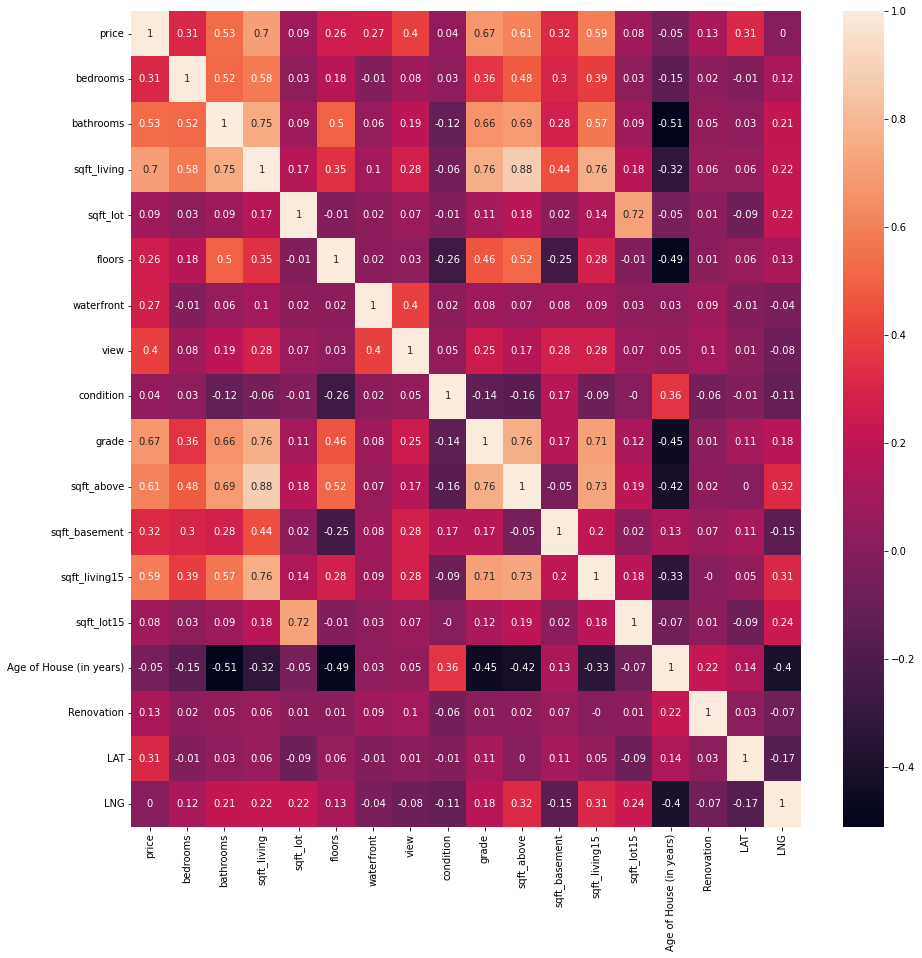

In [406]:
plt.subplots(figsize=(15,15))
correlation_matrix = dataset_mappedZipCodes.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [407]:
#Correlation Columns with Output
def correlation(dataset_mappedZipCodes,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset_mappedZipCodes.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(dataset_mappedZipCodes,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: [('sqft_above', 'sqft_living')]


In the above Correlation Heatmap, there is no signifcant correlation between the features except features ('sqft_above', 'sqft_living')

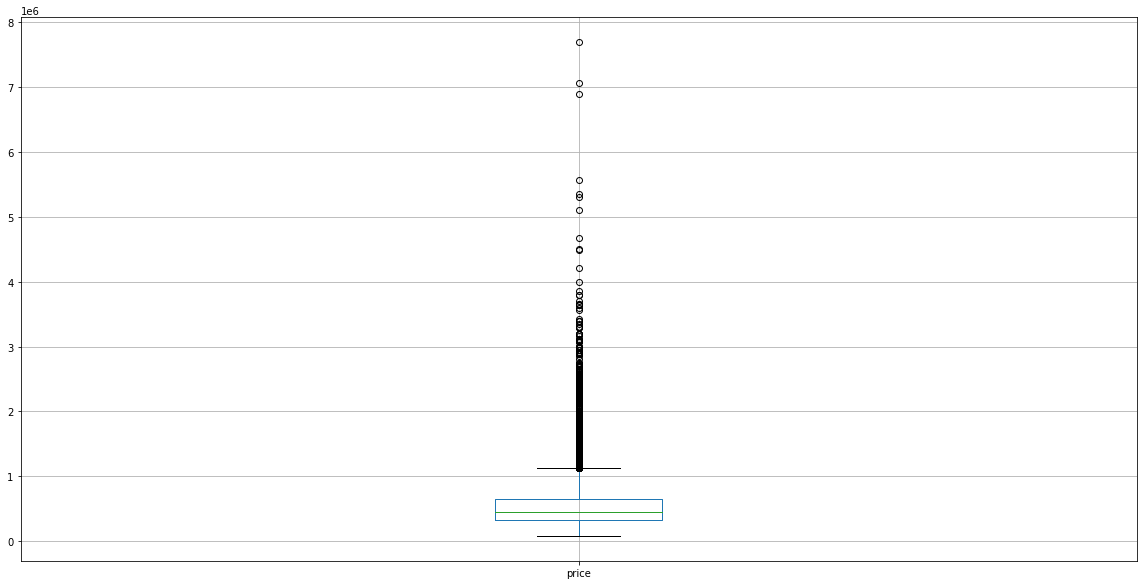

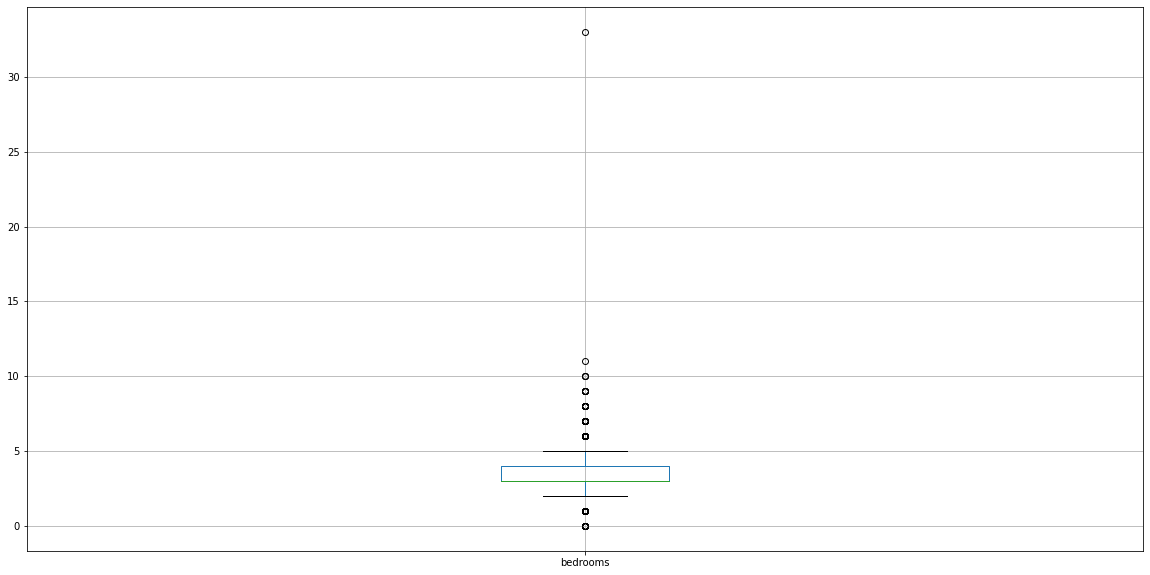

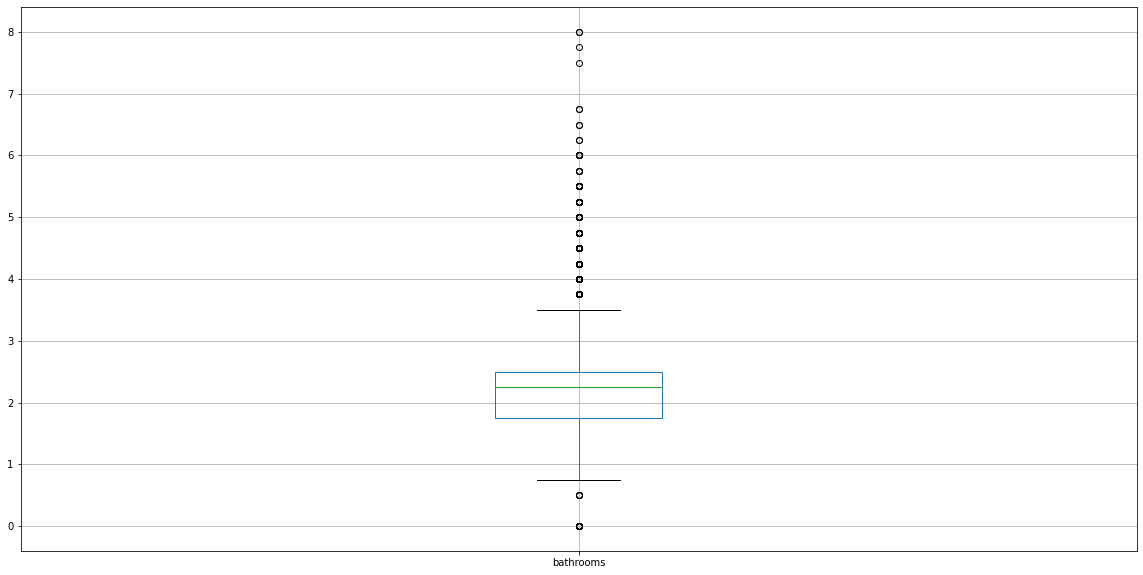

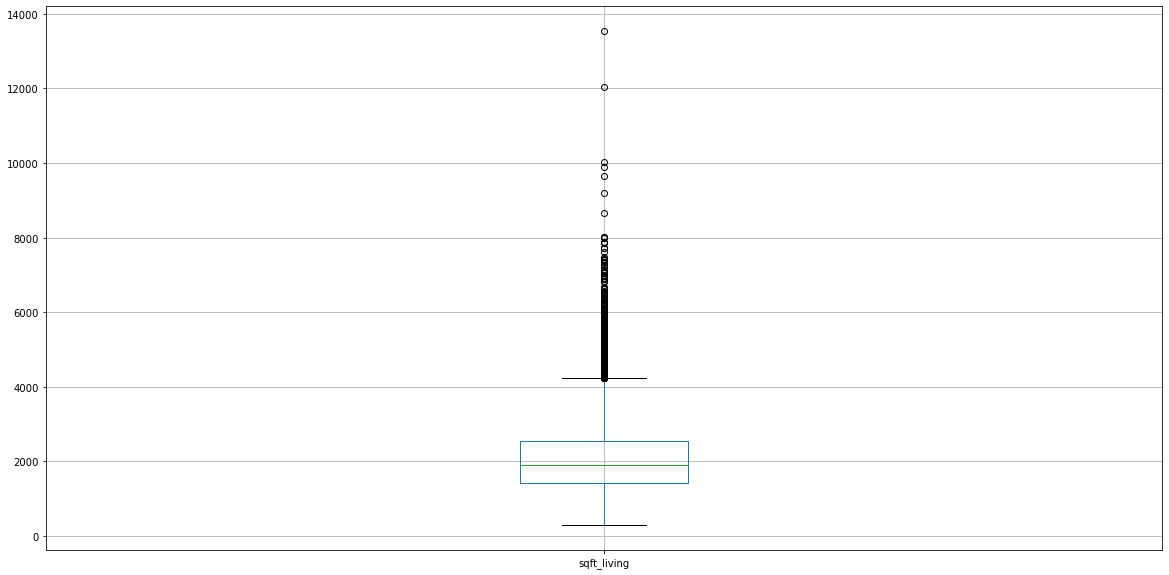

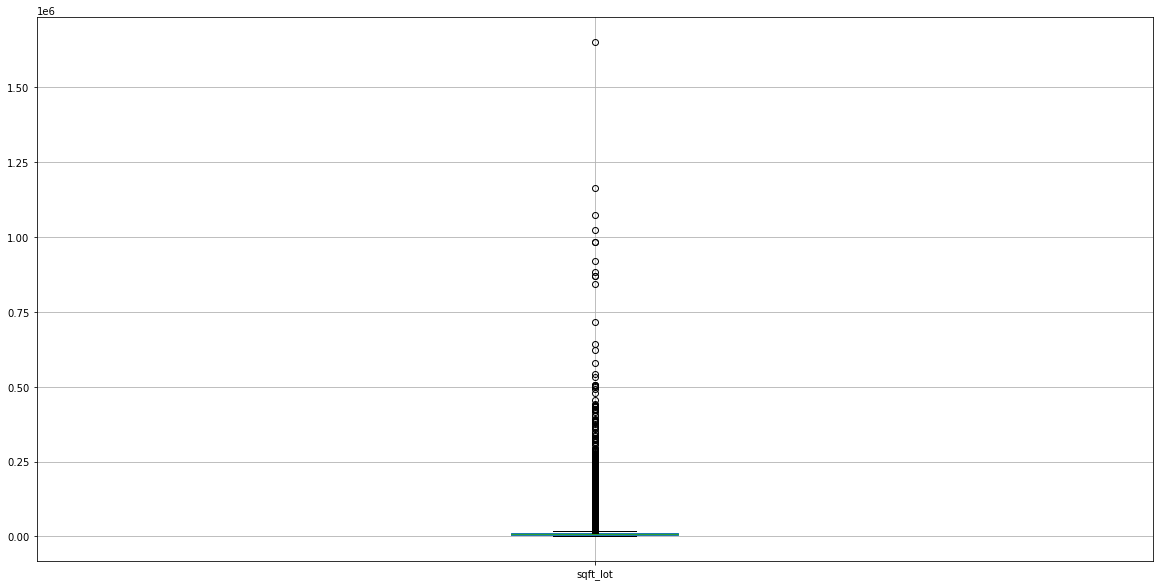

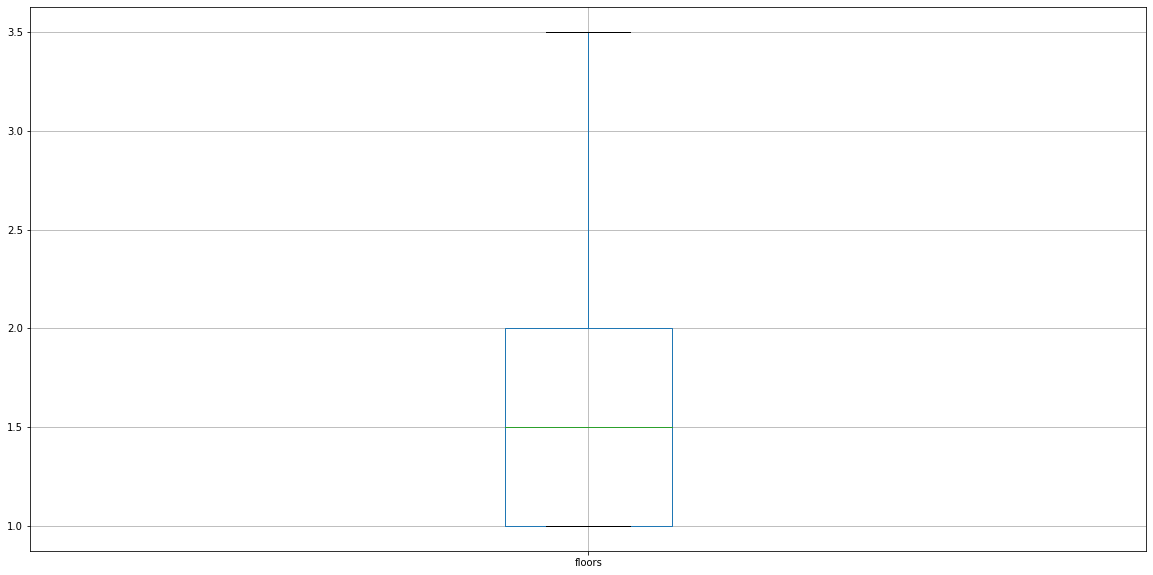

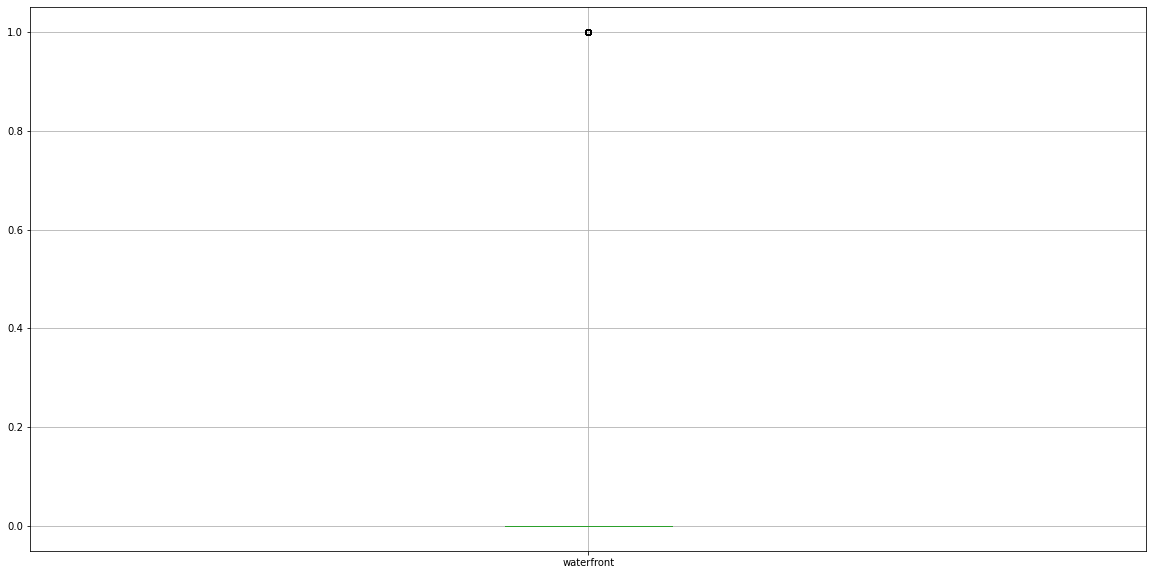

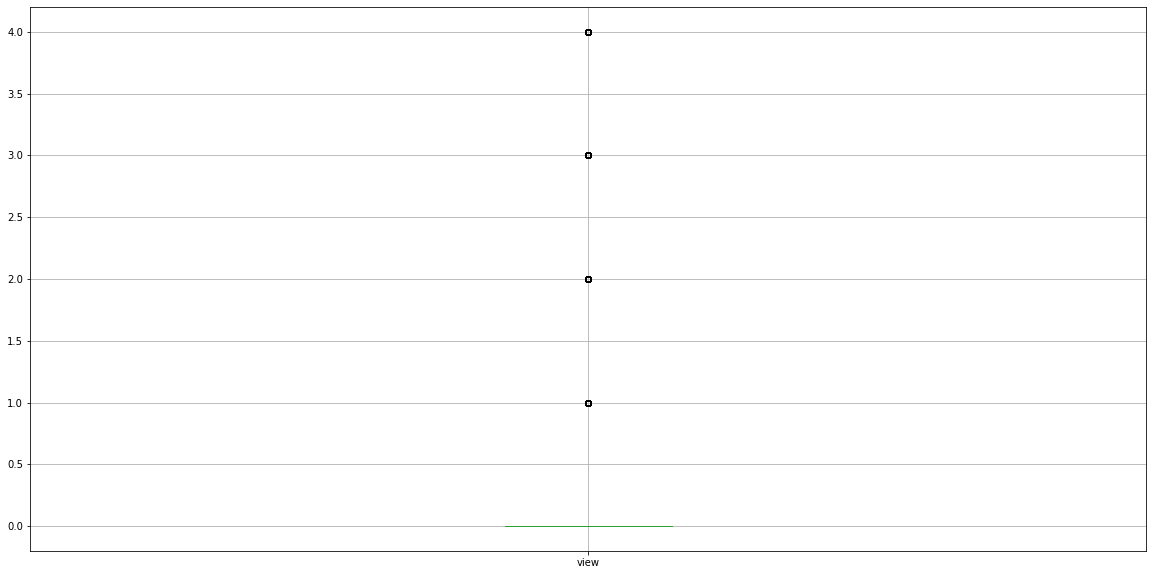

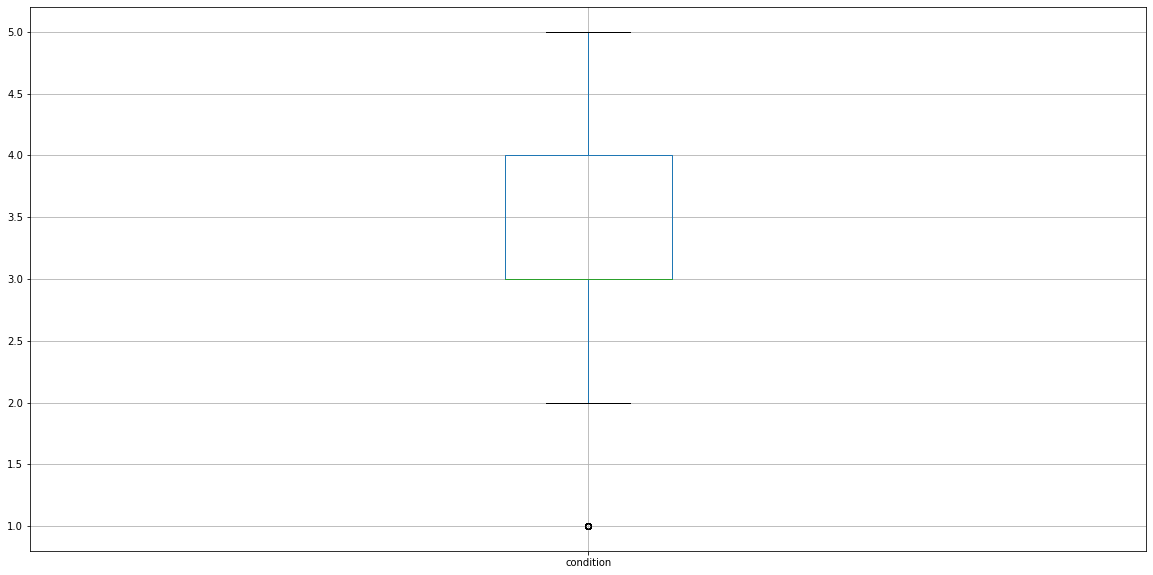

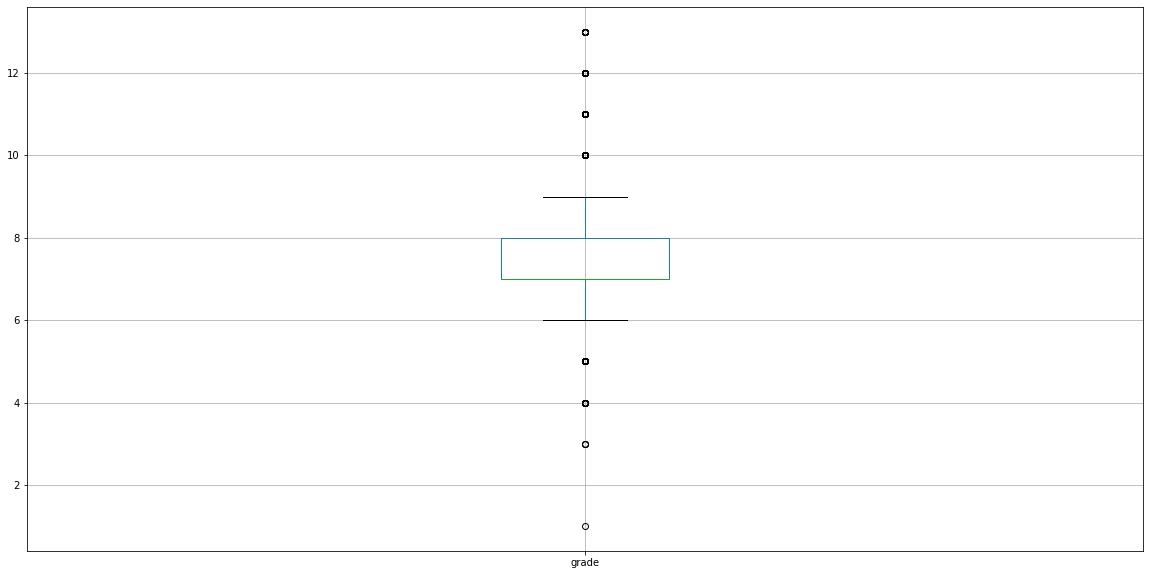

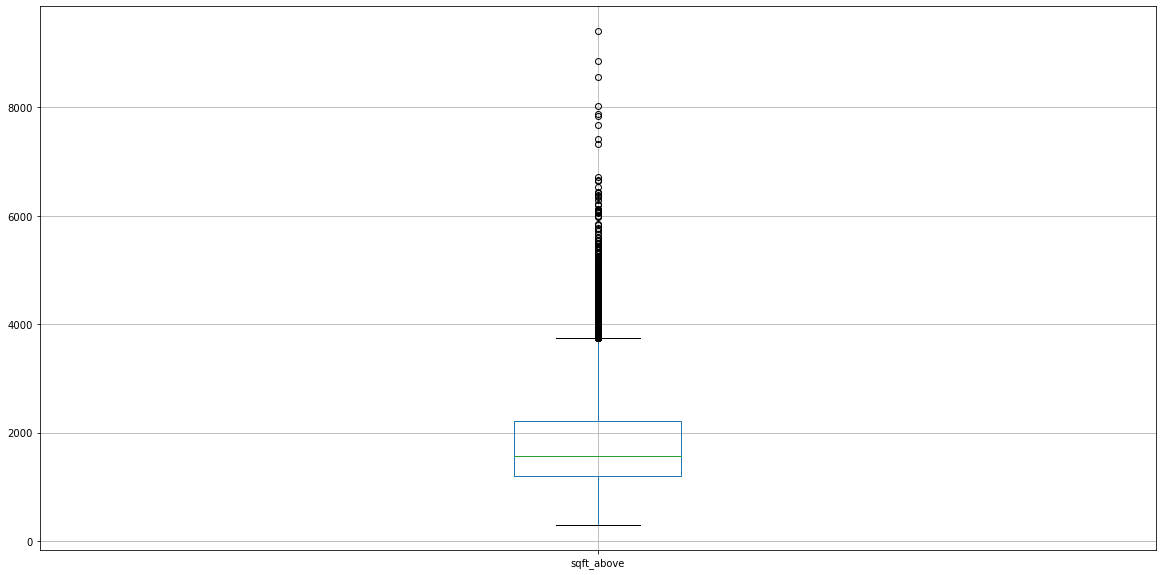

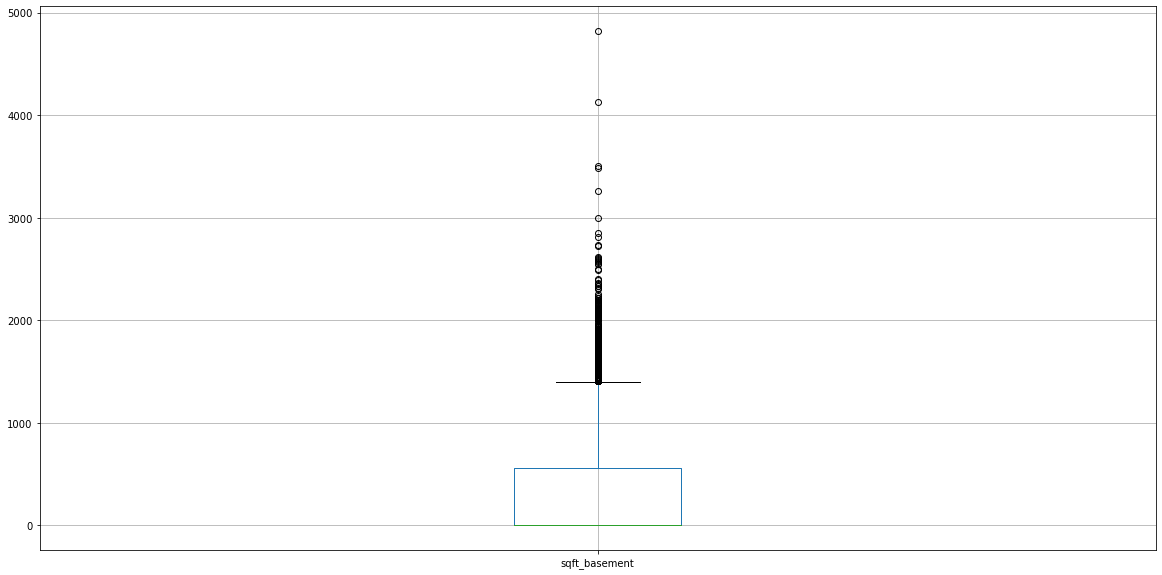

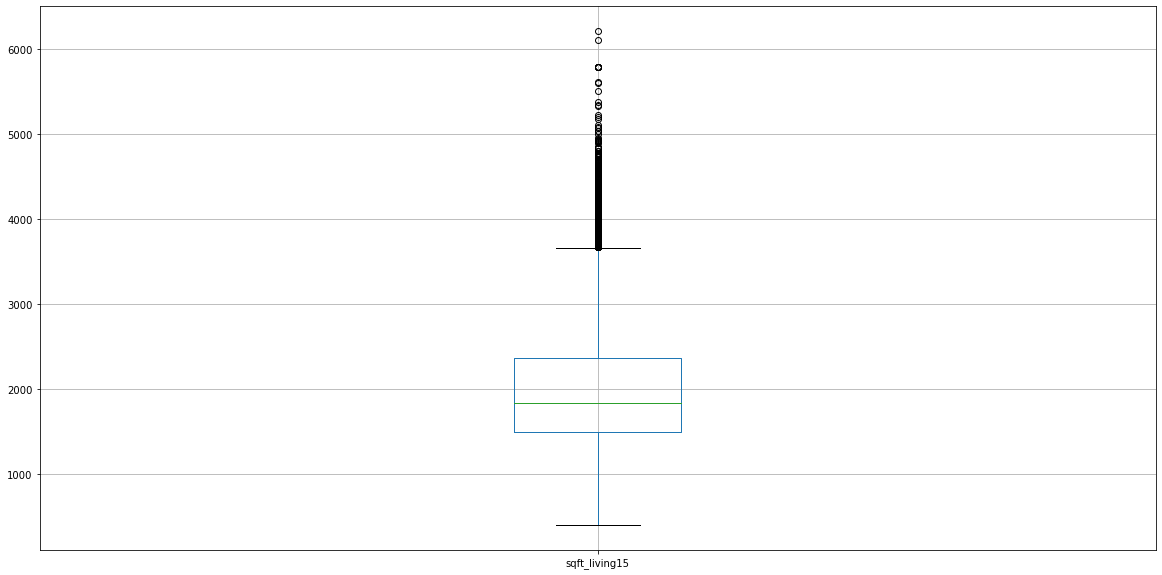

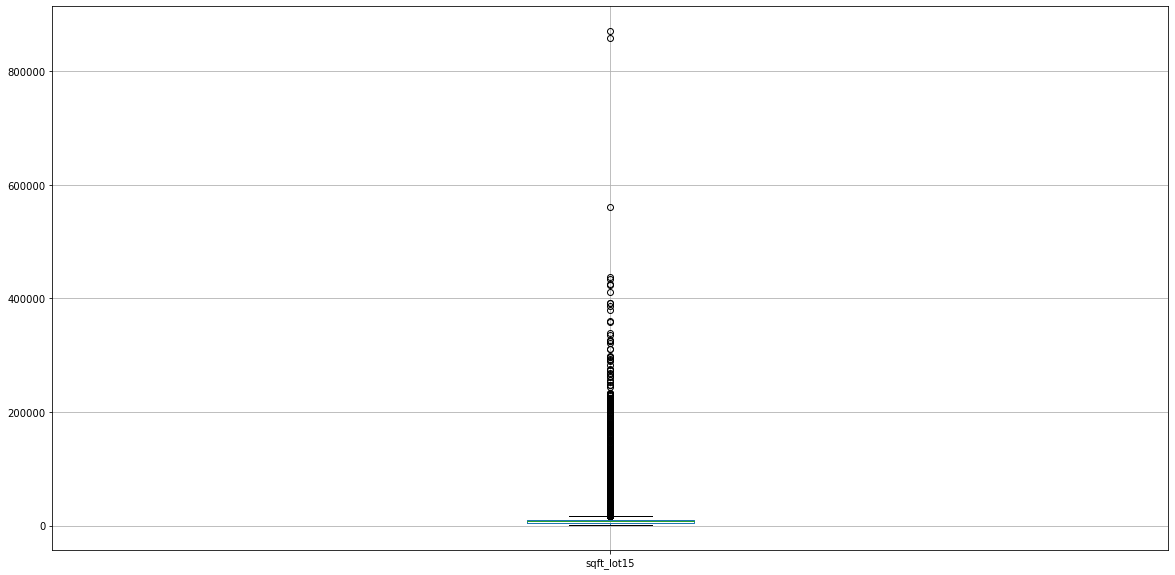

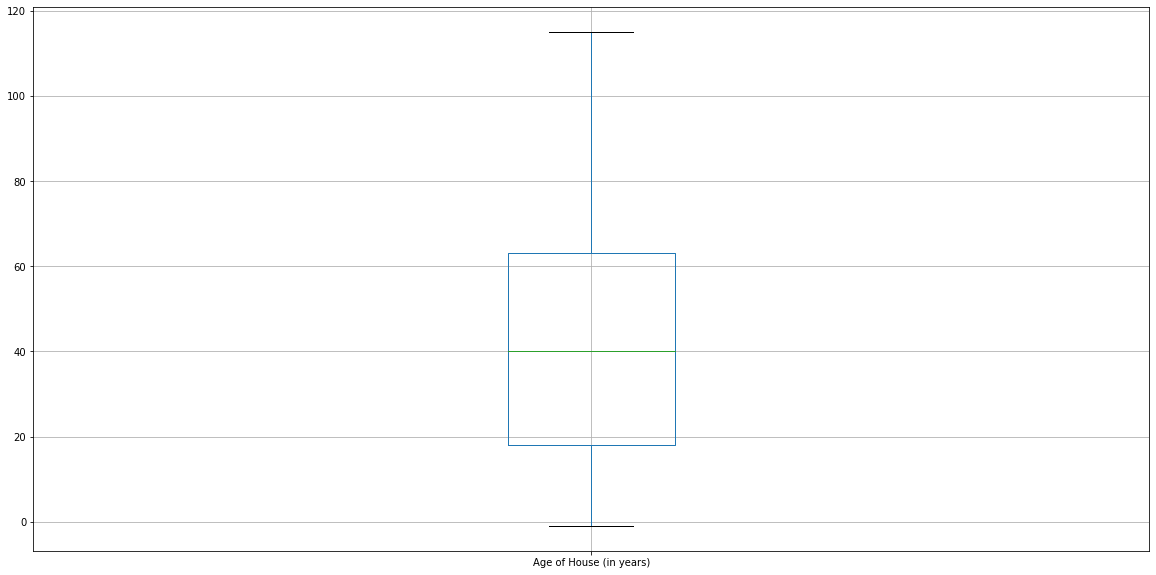

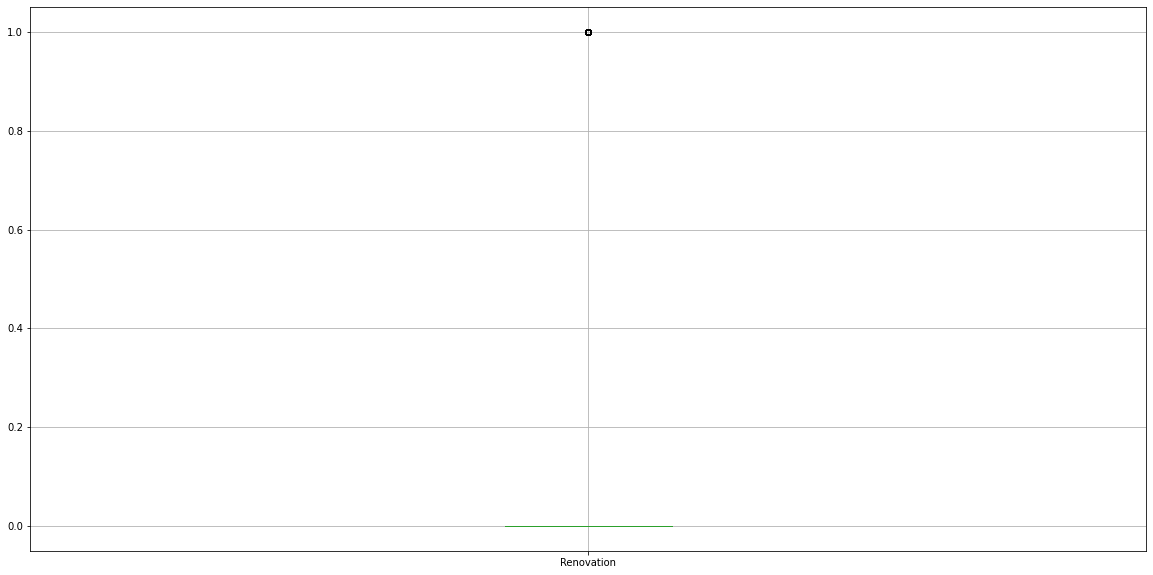

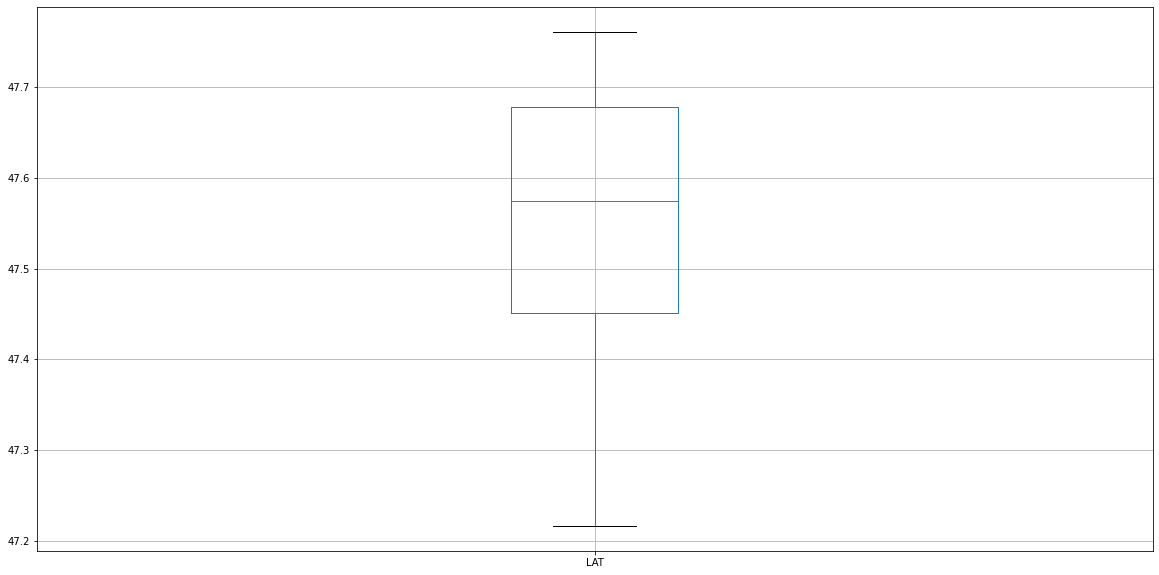

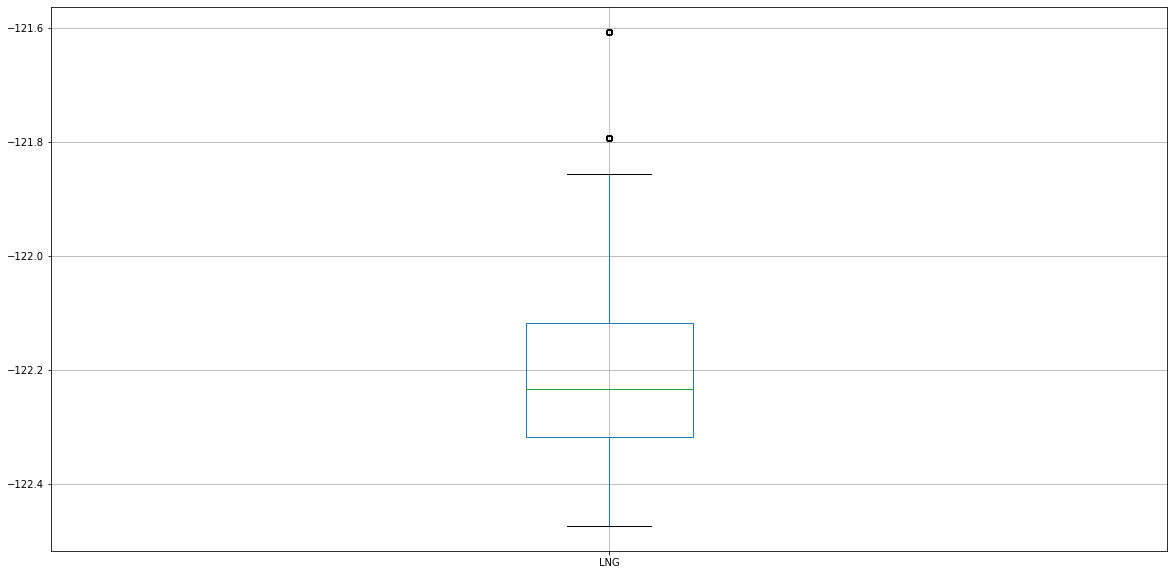

In [408]:
for col in dataset_mappedZipCodes.columns:
    plt.figure(figsize=(20,10))
    dataset_mappedZipCodes.boxplot(column=[col])

Detecting Outliers

In [409]:
# Import required libraries
from collections import Counter

# Outlier detection 
def detect_outliers(dataset_mappedZipCodes,n,features):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(dataset_mappedZipCodes[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(dataset_mappedZipCodes[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = dataset_mappedZipCodes[(dataset_mappedZipCodes[col] < Q1 - outlier_step) | (dataset_mappedZipCodes[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing mor 

Since there are 6883 rows which have outliers and this constitute around 32% of the data. Deleting these rows will result into loss of huge amount of details and data therefore We will not be deleting them.

In [410]:
#VIF Factors
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = dataset_mappedZipCodes._get_numeric_data() #This line will drop non-numeric cols
x = dataset_mappedZipCodes.drop(['sqft_living'],axis=1)

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif.sort_values('VIF Factor')

,VIF Factor,features
14,1.195375,Renovation
5,1.274174,waterfront
6,1.591845,view
3,2.365979,sqft_lot
12,2.588196,sqft_lot15
10,3.004649,sqft_basement
13,7.164511,Age of House (in years)
0,9.995370,price
4,16.838480,floors
1,23.648195,bedrooms


LAT and LNG has high variance inflation factor therefore we will be removing this column from our final dataset.

In [411]:
data_New = dataset_mappedZipCodes.drop(['LAT','LNG'],axis=1)
data_New

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,Age of House (in years),Renovation
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,63,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,1530,1509,5,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,1830,7200,1,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,1020,2007,5,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,1410,1287,11,0


# Model Building and Evaluate Algorithms
a) Split-out validation dataset
b) Test options and evaluation metric
c) Spot Check Algorithms
d) Compare Algorithms

# Split-out validation dataset

In [412]:
#Splitting the dataset into 3 parts (Train, test and Validation Dataset)
from sklearn.model_selection import train_test_split
y = data_New['price'].to_numpy()
x = data_New.drop('price', axis=1).to_numpy()

train_ratio = 0.60 # train is now 60% of the entire data set
validation_ratio = 0.20 # test is now 20% of the initial data set
test_ratio = 0.20 # validation is now 20% of the initial data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)
x_val2 = sc.transform(x_val)

In [413]:
#Model
from sklearn.linear_model import LinearRegression

from sklearn import metrics

for name,method in [('Linear regression', LinearRegression())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('\nLinear Regression Model')
print('\nMethod: {}'.format(name))   

#Coefficents
print('\nIntercept: {:.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),
                         data_New.drop(['price'],axis=1).columns,
                         columns=['Coefficients'])
print(coeff_table)
    
#R2,MAE,MSE and RMSE
print('\nR2: {:.2f}'.format(metrics.r2_score(y_test,predict)))
adjusted_r_squared = 1-(1-metrics.r2_score(y_test,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 


Linear Regression Model

Method: Linear regression

Intercept: 538158.94
                          Coefficients
bedrooms                 -33478.893139
bathrooms                 32700.404825
sqft_living               73761.757683
sqft_lot                   2198.304222
floors                    16531.277737
waterfront                47851.418580
view                      35643.546107
condition                 12871.188684
grade                    143137.632498
sqft_above                60609.916684
sqft_basement             39917.296189
sqft_living15             19470.212116
sqft_lot15               -16085.125736
Age of House (in years)  104346.118003
Renovation                 3968.506935

R2: 0.66
Adj_R2: 0.66
Mean Absolute Error: 141103.14
Mean Squared Error: 50528760718.31
Root Mean Squared Error: 224786.03


# Spot Check Algorithms & Compare Algorithms

In [414]:
#Script for Regression Tree Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn import metrics


for name,method in [('Decision Tree', DecisionTreeRegressor(random_state=7)),
                   ('Bagging Regressor',BaggingRegressor(random_state=7)),
                   ('AdaBoost',AdaBoostRegressor(random_state=7)),
                   ('GBR', GradientBoostingRegressor(random_state=7)),
                   ('LinearRegression',LinearRegression())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    


    print('\nModel - Original')
    print('\nMethod: {}'.format(name))  
    

    #MAE,MSE and RMSE

    print('R2: {:.2f}'.format(metrics.r2_score(y_test, predict)))
    adjusted_r_squared2 = 1-(1-metrics.r2_score(y_test,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
    print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))
    print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
    print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
    print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 


Model - Original

Method: Decision Tree
R2: 0.53
Adj_R2: 0.53
Mean Absolute Error: 159114.07
Mean Squared Error: 69119210592.79
Root Mean Squared Error: 262905.33

Model - Original

Method: Bagging Regressor
R2: 0.74
Adj_R2: 0.74
Mean Absolute Error: 120140.49
Mean Squared Error: 37829482971.44
Root Mean Squared Error: 194498.03

Model - Original

Method: AdaBoost
R2: 0.38
Adj_R2: 0.38
Mean Absolute Error: 245157.27
Mean Squared Error: 91497740784.55
Root Mean Squared Error: 302485.93

Model - Original

Method: GBR
R2: 0.78
Adj_R2: 0.78
Mean Absolute Error: 118982.98
Mean Squared Error: 32924192169.68
Root Mean Squared Error: 181450.25

Model - Original

Method: LinearRegression
R2: 0.66
Adj_R2: 0.66
Mean Absolute Error: 141103.14
Mean Squared Error: 50528760718.31
Root Mean Squared Error: 224786.03


In [415]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

for name,knnr_model in [('KNN Regressor', KNeighborsRegressor())]:
    knnr_model.fit(x_train2,y_train)
    predict = knnr_model.predict(x_test2)
    

print('Method: {}'.format(name))   

    
#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(r2_score(y_test, predict)))
adjusted_r_squared2 = 1-(1-metrics.r2_score(y_test,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))



print('\nMean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict))))

Method: KNN Regressor

R2: 0.70
Adj_R2: 0.70

Mean Absolute Error: 126699.62
Mean Squared Error: 43972668349.41
Root Mean Squared Error: 209696.61


We have run 6 ML Models:-
1. Linear Regression
2. Decision Tree
3. AdaBoost
4. Gradient Boosting Regressor
5. KNN Regression

After Comparing all the model's metric, Gradient Boosting Regressor has better Adj R2 value and lowest RMSE. Therefore, we will proceed with Gradient Boosting Regressor model and further optimize it with few hyperparameter tunining. Further, Gradient Boosting ML is a powerful ensemble machine learning algorithm that uses decision trees.

# Algorithm Tuning & Ensembles

In [416]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {'n_estimators': [100, 200, 300, 1000],
              'max_features': ['auto', 'log2', 'sqrt'],
              'learning_rate': [0.1, 0.5, 0.9]}


# Create a based model
gbr = GradientBoostingRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gbr, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best parameters and the best score
print(grid_search.best_params_)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
{'learning_rate': 0.1, 'max_features': 'log2', 'n_estimators': 1000}


Using the new hyperparameter to optimize the model performance.

In [417]:
#Creating a model after tuning hyperparameter of the Gradient Boosting Regressor.
for name,grid_search in [('Gradient Boosting Regressor', GradientBoostingRegressor(learning_rate=0.1, max_features= 'log2', n_estimators= 1000, random_state=7))]:
    grid_search.fit(x_train2,y_train)
    predict = grid_search.predict(x_test2)
    

print('Method: {}'.format(name))   

    
#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(r2_score(y_test, predict)))
adjusted_r_squared2 = 1-(1-metrics.r2_score(y_test,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))



print('\nMean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict))))

Method: Gradient Boosting Regressor

R2: 0.77
Adj_R2: 0.77

Mean Absolute Error: 115332.17
Mean Squared Error: 33874722116.85
Root Mean Squared Error: 184050.87


We can see above that RMSE in the optized model is less than Original Model

# Predictions on validation dataset

In [418]:
#Predicting the R2 value using Validation Dataset
predict = grid_search.predict(x_val2)
    

print('Method: {}'.format(name))   

    
#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(r2_score(y_val, predict)))
adjusted_r_squared2 = 1-(1-metrics.r2_score(y_val,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))



print('\nMean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_val, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_val, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_val, predict))))

Method: Gradient Boosting Regressor

R2: 0.71
Adj_R2: 0.71

Mean Absolute Error: 119977.96
Mean Squared Error: 36358320844.09
Root Mean Squared Error: 190678.58


We can see above that there no significant change in the model performance after testing it on validation dataset.

# Create standalone model on entire training dataset & Save model for later use

In [419]:
import pickle
pickle.dump(sc, open('transform.pkl','wb'))

In [420]:
#Transforming the whole  and saving the model for a later use.
sc_tranformer = pickle.load(open('transform.pkl', 'rb'))
x_full = sc_tranformer.fit_transform(x)

In [421]:
#Training with whole dataset and saving in local using pickle
for name,grid_search in [('Gradient Boosting Regressor', GradientBoostingRegressor(learning_rate=0.1, max_features= 'log2', n_estimators= 1000, random_state=7))]:
    grid_search.fit(x_full,y)
    pickle.dump(grid_search, open('gbr.pkl','wb'))

In [422]:
# load the Model from disk and sanity check with validation data
grid_search = pickle.load(open('gbr.pkl', 'rb'))

#Predicting the R2 value using Validation Dataset
predict = grid_search.predict(x_full)
    

print('Method: {}'.format(name))   

    
#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(r2_score(y, predict)))
adjusted_r_squared2 = 1-(1-metrics.r2_score(y,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))



print('\nMean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y, predict))))

Method: Gradient Boosting Regressor

R2: 0.86
Adj_R2: 0.86

Mean Absolute Error: 100823.40
Mean Squared Error: 19161389626.98
Root Mean Squared Error: 138424.67


# Conclusions and Recommendations

As we have optimized Gradient Boosting Regressor model with minimum hyperparameter tuning because of system configuration constraints therefore we should continously work towards tuning hyperparameter of all the algorithms to ger best possible results.